In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import splitfolders
from matplotlib import pyplot as plt

### Function to Create Model


In [2]:
def create_model(base_model, input_shape=(224, 224, 3), num_classes=2):
    base_model.trainable = False
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Data Generations


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_bin = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator_bin = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator_bin = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

train_generator_cat = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator_cat = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator_cat = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 4951 images belonging to 2 classes.
Found 1413 images belonging to 2 classes.
Found 709 images belonging to 2 classes.
Found 4951 images belonging to 2 classes.
Found 1413 images belonging to 2 classes.
Found 709 images belonging to 2 classes.


### Resnet50


In [9]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model = create_model(resnet_base)
resnet_history = resnet_model.fit(train_generator_cat, epochs=10, validation_data=val_generator_cat)
resnet_val_loss, resnet_val_acc = resnet_model.evaluate(val_generator_cat)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_generator_cat)
print(f"ResNet - Validation Loss: {resnet_val_loss}, Validation Accuracy: {resnet_val_acc}")
print(f"ResNet - Test Loss: {resnet_test_loss}, Test Accuracy: {resnet_test_acc}")

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.9107 - loss: 0.8317 - val_accuracy: 0.9515 - val_loss: 0.1212
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.9524 - loss: 0.1219 - val_accuracy: 0.8812 - val_loss: 0.2261
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9419 - loss: 0.1427 - val_accuracy: 0.9536 - val_loss: 0.1366
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.9394 - loss: 0.1484 - val_accuracy: 0.9599 - val_loss: 0.0991
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.9522 - loss: 0.1137 - val_accuracy: 0.9613 - val_loss: 0.1034
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9539 - loss: 0.1170 - val_accuracy: 0.9620 - val_loss: 0.0930
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9577 - loss: 0.0983 - val_accuracy: 0.9550 - val_loss: 0.1184
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.9464 - loss: 0.1431 - val_accu

### VGG


In [10]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model = create_model(vgg_base)
vgg_history = vgg_model.fit(train_generator_cat, epochs=10, validation_data=val_generator_cat)
vgg_val_loss, vgg_val_acc = vgg_model.evaluate(val_generator_cat)
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_generator_cat)
print(f"VGG - Validation Loss: {vgg_val_loss}, Validation Accuracy: {vgg_val_acc}")
print(f"VGG - Test Loss: {vgg_test_loss}, Test Accuracy: {vgg_test_acc}")

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.9464 - loss: 0.2148 - val_accuracy: 0.9747 - val_loss: 0.0603
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.9755 - loss: 0.0551 - val_accuracy: 0.9578 - val_loss: 0.1314
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.9817 - loss: 0.0501 - val_accuracy: 0.9866 - val_loss: 0.0371
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 393s 3s/step - accuracy: 0.9885 - loss: 0.0286 - val_accuracy: 0.9873 - val_loss: 0.0357
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.9901 - loss: 0.0261 - val_accuracy: 0.9873 - val_loss: 0.0334
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.9950 - loss: 0.0165 - val_accuracy: 0.9887 - val_loss: 0.0344
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.9961 - loss: 0.0137 - val_accuracy: 0.9789 - val_loss: 0.0522
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 392s 3s/step - accuracy: 0.9927 - loss: 0.0240 - val_accu

### DenseNet


In [11]:
from tensorflow.keras.applications import DenseNet121

# Create and train the DenseNet model
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_model = create_model(densenet_base)
densenet_history = densenet_model.fit(train_generator_cat, epochs=10, validation_data=val_generator_cat)
densenet_val_loss, densenet_val_acc = densenet_model.evaluate(val_generator_cat)
densenet_test_loss, densenet_test_acc = densenet_model.evaluate(test_generator_cat)
print(f"DenseNet - Validation Loss: {densenet_val_loss}, Validation Accuracy: {densenet_val_acc}")
print(f"DenseNet - Test Loss: {densenet_test_loss}, Test Accuracy: {densenet_test_acc}")

# Save the DenseNet model
densenet_model.save('densenet_model.h5')

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9327 - loss: 0.6768 - val_accuracy: 0.9831 - val_loss: 0.0401
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.9840 - loss: 0.0392 - val_accuracy: 0.9887 - val_loss: 0.0286
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.9879 - loss: 0.0317 - val_accuracy: 0.9895 - val_loss: 0.0259
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.9954 - loss: 0.0163 - val_accuracy: 0.9895 - val_loss: 0.0246
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.9925 - loss: 0.0190 - val_accuracy: 0.9887 - val_loss: 0.0313
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.9943 - loss: 0.0165 - val_accuracy: 0.9852 - val_loss: 0.0438
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.9929 - loss: 0.0123 - val_accuracy: 0.9887 - val_loss: 0.0264
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.9914 - loss: 0.0198 - val_accu

DenseNet - Validation Loss: 0.032801855355501175, Validation Accuracy: 0.9887482523918152
DenseNet - Test Loss: 0.028278695419430733, Test Accuracy: 0.9887164831161499


### MobileNet


In [12]:
from tensorflow.keras.applications import MobileNetV2

# Create and train the MobileNetV2 model
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_model = create_model(mobilenet_base)
mobilenet_history = mobilenet_model.fit(train_generator_cat, epochs=10, validation_data=val_generator_cat)
mobilenet_val_loss, mobilenet_val_acc = mobilenet_model.evaluate(val_generator_cat)
mobilenet_test_loss, mobilenet_test_acc = mobilenet_model.evaluate(test_generator_cat)
print(f"MobileNetV2 - Validation Loss: {mobilenet_val_loss}, Validation Accuracy: {mobilenet_val_acc}")
print(f"MobileNetV2 - Test Loss: {mobilenet_test_loss}, Test Accuracy: {mobilenet_test_acc}")

# Save the MobileNetV2 model
mobilenet_model.save('models/mobilenet_model.h5')

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.9356 - loss: 0.8768 - val_accuracy: 0.9845 - val_loss: 0.0367
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9866 - loss: 0.0324 - val_accuracy: 0.9831 - val_loss: 0.0352
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9909 - loss: 0.0225 - val_accuracy: 0.9845 - val_loss: 0.0371
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9938 - loss: 0.0137 - val_accuracy: 0.9859 - val_loss: 0.0392
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9902 - val_loss: 0.0297
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9956 - loss: 0.0100 - val_accuracy: 0.9880 - val_loss: 0.0346
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.9944 - loss: 0.0156 - val_accuracy: 0.9916 - val_loss: 0.0269
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9937 - loss: 0.0124 - val_accu

MobileNetV2 - Validation Loss: 0.06376659125089645, Validation Accuracy: 0.9803094267845154
MobileNetV2 - Test Loss: 0.06711423397064209, Test Accuracy: 0.9802538752555847


#### AlexNet


In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# Function to create AlexNet model
def create_alexnet(input_shape=(224, 224, 3), num_classes=2):
    model = tf.keras.Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(256, (5, 5), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the AlexNet model
alexnet_model = create_alexnet()
alexnet_history = alexnet_model.fit(train_generator_cat, epochs=10, validation_data=val_generator_cat)
alexnet_val_loss, alexnet_val_acc = alexnet_model.evaluate(val_generator_cat)
alexnet_test_loss, alexnet_test_acc = alexnet_model.evaluate(test_generator_cat)
print(f"AlexNet - Validation Loss: {alexnet_val_loss}, Validation Accuracy: {alexnet_val_acc}")
print(f"AlexNet - Test Loss: {alexnet_test_loss}, Test Accuracy: {alexnet_test_acc}")

# Save the AlexNet model
alexnet_model.save('models/alexnet_model.h5')

E:\Programing\ML\ml-venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9432 - loss: 0.2105 - val_accuracy: 0.9508 - val_loss: 0.1074
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9488 - loss: 0.1046 - val_accuracy: 0.9501 - val_loss: 0.0915
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9550 - loss: 0.0871 - val_accuracy: 0.9627 - val_loss: 0.0863
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9550 - loss: 0.0881 - val_accuracy: 0.9669 - val_loss: 0.0792
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9490 - loss: 0.0898 - val_accuracy: 0.9557 - val_loss: 0.0735
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.9575 - loss: 0.0828 - val_accuracy: 0.9508 - val_loss: 0.0860
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9590 - loss: 0.0747 - val_accuracy: 0.9655 - val_loss: 0.0819
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9543 - loss: 0.0771 - val_accu

AlexNet - Validation Loss: 0.07058943808078766, Validation Accuracy: 0.9613220691680908
AlexNet - Test Loss: 0.07603441178798676, Test Accuracy: 0.9703808426856995


### ConvNet


In [8]:
convnet_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
convnet_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
convnet_history = convnet_model.fit(
    train_generator_bin,
    steps_per_epoch=train_generator_bin.samples // train_generator_bin.batch_size,
    epochs=10,
    validation_data=val_generator_bin,
    validation_steps=val_generator_bin.samples // val_generator_bin.batch_size
)
convnet_val_loss, convnet_val_acc = convnet_model.evaluate(val_generator_bin)
convnet_test_loss, convnet_test_acc = convnet_model.evaluate(test_generator_bin)
print(f"ConvNet - Validation Loss: {convnet_val_loss}, Validation Accuracy: {convnet_val_acc}")
print(f"ConvNet - Test Loss: {convnet_test_loss}, Test Accuracy: {convnet_test_acc}")

Epoch 1/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


154/154 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.9209 - loss: 0.2219 - val_accuracy: 0.9503 - val_loss: 0.1057
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0354 - val_accuracy: 1.0000 - val_loss: 0.0157
Epoch 3/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


154/154 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9523 - loss: 0.1021 - val_accuracy: 0.9510 - val_loss: 0.0946
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 1.0000 - loss: 0.0483 - val_accuracy: 1.0000 - val_loss: 3.4433e-32
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9533 - loss: 0.0968 - val_accuracy: 0.9595 - val_loss: 0.0758
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.9688 - loss: 0.0487 - val_accuracy: 0.8000 - val_loss: 0.1423
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9554 - loss: 0.0834 - val_accuracy: 0.9517 - val_loss: 0.1192
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.9375 - loss: 0.0947 - val_accuracy: 0.8000 - val_loss: 0.2559
Epoch 9/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9545 - loss: 0.0923 - val_accuracy: 0.9638 - val_loss: 0.0757
Epoch 10/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.9688 - loss: 0.0754 - val_accura

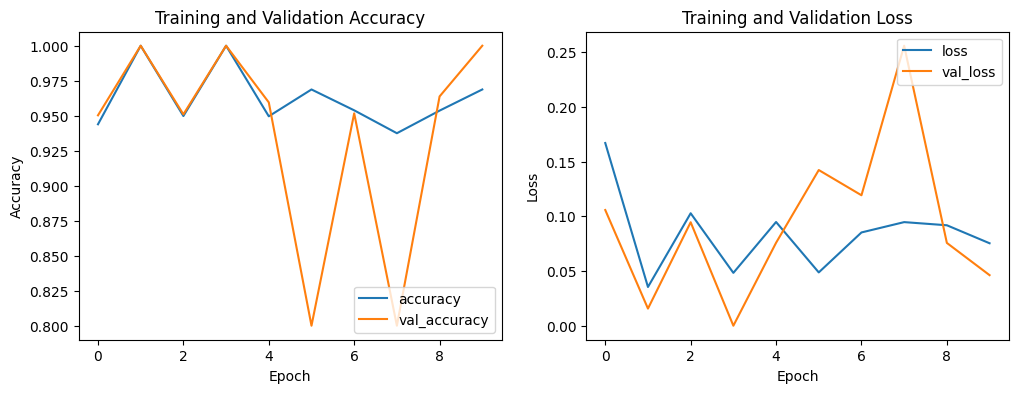

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(convnet_history.history['accuracy'], label='accuracy')
plt.plot(convnet_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(convnet_history.history['loss'], label='loss')
plt.plot(convnet_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Adaptive SSN


In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.layers import GlobalAveragePooling2D, Multiply

def adaptive_ssn(input_shape):
    inputs = Input(shape=input_shape)
    
    # First convolutional block
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    # Second convolutional block
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    # Third convolutional block
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Adaptive Smoothing Layer (a simplified example)
    attention = GlobalAveragePooling2D()(x)
    attention = Dense(128, activation='sigmoid')(attention)
    attention = Dense(128, activation='sigmoid')(attention)
    x = Multiply()([x, attention])
    
    # Fully connected layer
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, x)
    return model

adaptive_ssn_model = adaptive_ssn((224, 224, 3))
adaptive_ssn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
adaptive_ssn_model.summary()

adaptive_ssn_history = adaptive_ssn_model.fit(
    train_generator_bin,
    steps_per_epoch=train_generator_bin.samples // train_generator_bin.batch_size,
    validation_data=val_generator_bin,
    validation_steps=val_generator_bin.samples // val_generator_bin.batch_size,
    epochs=10
)

adaptive_ssn_val_loss, adaptive_ssn_val_acc = adaptive_ssn_model.evaluate(val_generator_bin)
adaptive_ssn_test_loss, adaptive_ssn_test_acc = adaptive_ssn_model.evaluate(test_generator_bin)
print(f"Adaptive SSN - Validation Loss: {adaptive_ssn_val_loss}, Validation Accuracy: {adaptive_ssn_val_acc}")
print(f"Adaptive SSN - Test Loss: {adaptive_ssn_test_loss}, Test Accuracy: {adaptive_ssn_test_acc}")

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 224, 224,  │        896 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        128 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 112, 112,  │          0 │ activation_6[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 112, 112,  │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 56, 56,    │          0 │ activation_7[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 56, 56,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ activation_8[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │     16,512 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 56, 56,    │          0 │ activation_8[0][… │
│ (Multiply)          │ 128)              │            │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 401408)    │          0 │ multiply_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 128)       │ 51,380,352 │ flatten_4[0][0] 

 Total params: 51,508,161 (196.49 MB)

 Trainable params: 51,507,457 (196.49 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


154/154 ━━━━━━━━━━━━━━━━━━━━ 554s 4s/step - accuracy: 0.7650 - loss: 0.7537 - val_accuracy: 0.9510 - val_loss: 0.2331
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9062 - loss: 0.2207 - val_accuracy: 0.8000 - val_loss: 0.9478
Epoch 3/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


154/154 ━━━━━━━━━━━━━━━━━━━━ 463s 3s/step - accuracy: 0.9628 - loss: 0.1300 - val_accuracy: 0.9503 - val_loss: 0.1228
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9375 - loss: 0.1696 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 481s 3s/step - accuracy: 0.9669 - loss: 0.0796 - val_accuracy: 0.9503 - val_loss: 0.1335
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 4.2580e-04
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 519s 3s/step - accuracy: 0.9709 - loss: 0.0725 - val_accuracy: 0.9510 - val_loss: 0.9664
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 0.0265 - val_accuracy: 0.8000 - val_loss: 4.6522
Epoch 9/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 582s 4s/step - accuracy: 0.9598 - loss: 0.0800 - val_accuracy: 0.9609 - val_loss: 0.1242
Epoch 10/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9062 - loss: 0.1754 - val_accuracy: 0.80

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(adaptive_ssn_history.history['accuracy'], label='accuracy')
plt.plot(adaptive_ssn_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(adaptive_ssn_history.history['loss'], label='loss')
plt.plot(adaptive_ssn_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Saving the model


In [12]:
resnet_model.save('models/resnet_model.keras')
vgg_model.save('models/vgg_model.keras')
densenet_model.save('models/densenet_model.h5')
convnet_model.save('models/convnet_model.keras')
adaptive_ssn_model.save('models/adaptive_ssn_model.h5')

### Comparison of Model Performance


In [1]:
vgg_val_accuracy = 0.9908579587936401
vgg_test_accuracy = 0.9887164831161499
resnet_val_accuracy = 0.9641350507736206
resnet_test_accuracy = 0.9605077505111694
densenet_val_accuracy = 0.9887482523918152
densenet_test_accuracy = 0.9887164831161499
convnet_val_accuracy = 0.9631988406181335
convnet_test_accuracy = 0.9576869010925293
adaptive_ssn_val_accuracy = 0.9610757231712341
adaptive_ssn_test_accuracy = 0.9647390842437744
mobile_net_val_accuracy = 0.9803094267845154
mobile_net_test_accuracy = 0.9802538752555847
alex_net_val_accuracy = 0.9613220691680908
alex_net_test_accuracy = 0.9703808426856995


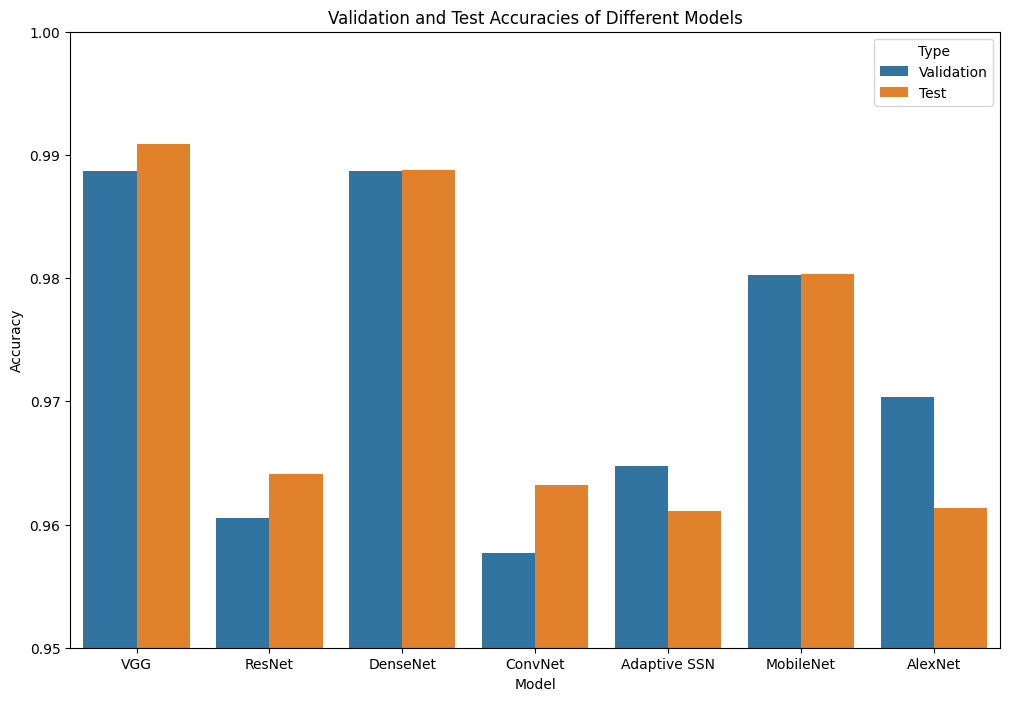

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
model_names = [
    "VGG", "ResNet", "DenseNet", "ConvNet", "Adaptive SSN", "MobileNet", "AlexNet"
]
test_accuracies = [
    0.9908579587936401, 0.9641350507736206, 0.9887482523918152,
    0.9631988406181335, 0.9610757231712341, 0.9803094267845154, 0.9613220691680908
]
val_accuracies = [
    0.9887164831161499, 0.9605077505111694, 0.9887164831161499,
    0.9576869010925293, 0.9647390842437744, 0.9802538752555847, 0.9703808426856995
]

# Create DataFrame
data = {
    "Model": model_names * 2,
    "Accuracy": val_accuracies + test_accuracies,
    "Type": ["Validation"] * len(model_names) + ["Test"] * len(model_names)
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Accuracy", hue="Type", data=df)
plt.title("Validation and Test Accuracies of Different Models")
plt.ylabel("Accuracy")
plt.ylim(0.95, 1.0)  # Set y-axis limit for better visualization
plt.show()


In [2]:
vgg_val_loss = 0.0287286639213562
vgg_test_loss = 0.030243590474128723
resnet_val_loss = 0.09060654044151306
resnet_test_loss = 0.09138935059309006
densenet_val_loss = 0.032801855355501175
densenet_test_loss = 0.032801855355501175
convnet_val_loss = 0.0763668566942215
convnet_test_loss = 0.08227366209030151
adaptive_ssn_val_loss = 0.12364420294761658
adaptive_ssn_test_loss = 0.1012168824672699
mobile_net_val_loss = 0.06376659125089645
mobile_net_test_loss = 0.06711423397064209
alex_net_val_loss = 0.07058943808078766
alex_net_test_loss = 0.07603441178798676


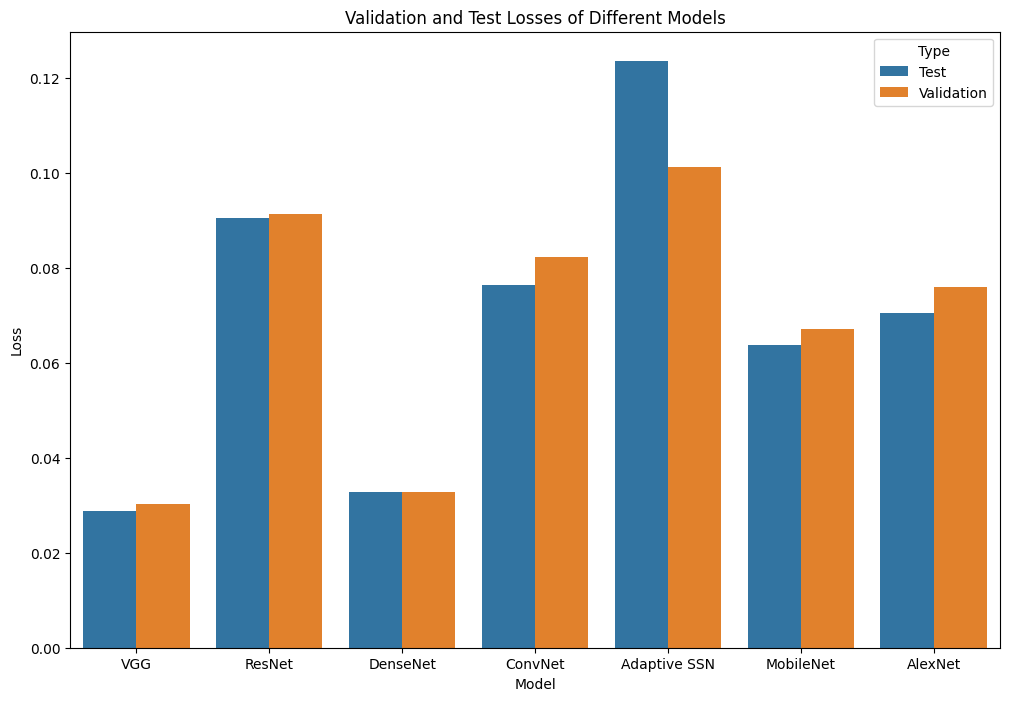

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
model_names = [
    "VGG", "ResNet", "DenseNet", "ConvNet", "Adaptive SSN", "MobileNet", "AlexNet"
]
test_losses = [
    0.0287286639213562, 0.09060654044151306, 0.032801855355501175,
    0.0763668566942215, 0.12364420294761658, 0.06376659125089645, 0.07058943808078766
]
val_losses = [
    0.030243590474128723, 0.09138935059309006, 0.032801855355501175,
    0.08227366209030151, 0.1012168824672699, 0.06711423397064209, 0.07603441178798676
]

# Create DataFrame
data = {
    "Model": model_names * 2,
    "Loss": test_losses + val_losses,
    "Type": ["Test"] * len(model_names) + ["Validation"] * len(model_names)
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Loss", hue="Type", data=df)
plt.title("Validation and Test Losses of Different Models")
plt.ylabel("Loss")
plt.show()


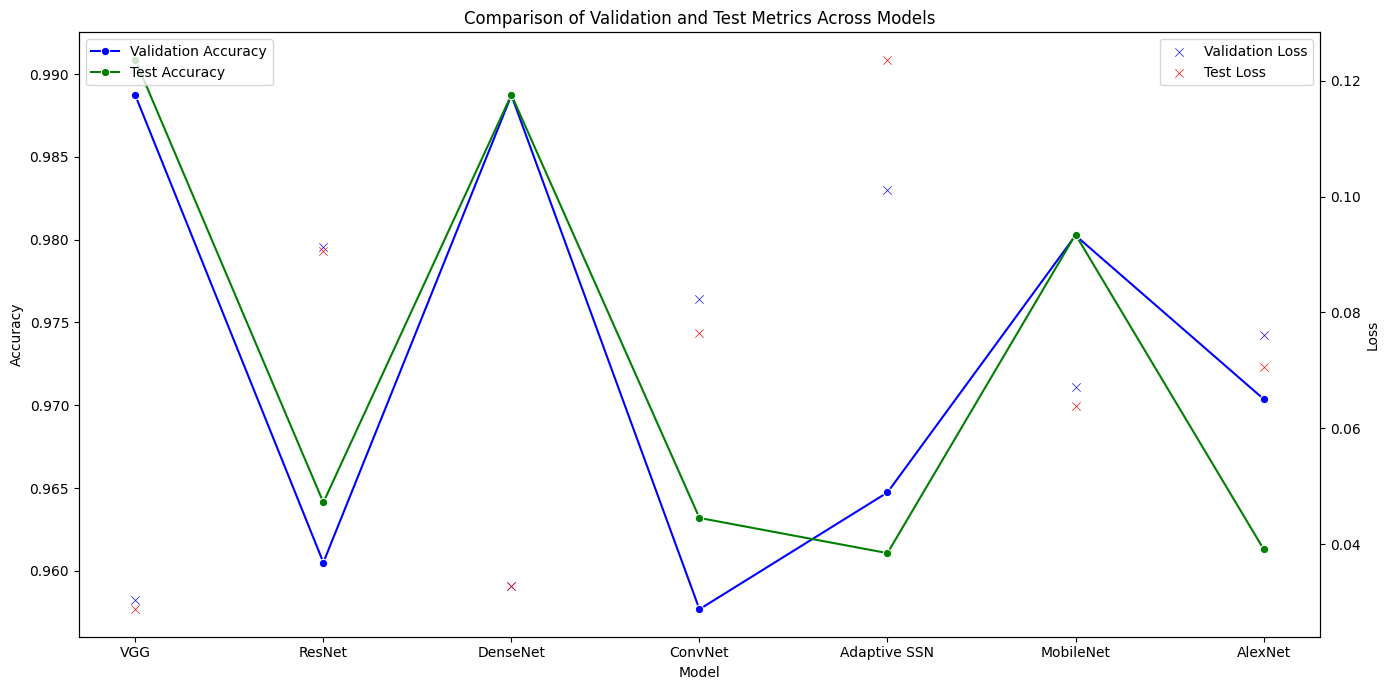

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Create DataFrames for easier manipulation
data_accuracy = {
    "Model": model_names,
    "Validation Accuracy": val_accuracies,
    "Test Accuracy": test_accuracies
}
df_accuracy = pd.DataFrame(data_accuracy)

data_loss = {
    "Model": model_names,
    "Validation Loss": val_losses,
    "Test Loss": test_losses
}
df_loss = pd.DataFrame(data_loss)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot accuracy
sns.lineplot(x="Model", y="Validation Accuracy", data=df_accuracy, marker='o', label="Validation Accuracy", ax=ax1, color="b")
sns.lineplot(x="Model", y="Test Accuracy", data=df_accuracy, marker='o', label="Test Accuracy", ax=ax1, color="g")

# Adding twin axis for loss
ax2 = ax1.twinx()
sns.scatterplot(x="Model", y="Validation Loss", data=df_loss, color="b", marker='x', label="Validation Loss", ax=ax2)
sns.scatterplot(x="Model", y="Test Loss", data=df_loss, color="r", marker='x', label="Test Loss", ax=ax2)

# Setting labels and titles
ax1.set_xlabel("Model")
ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Loss")
plt.title("Comparison of Validation and Test Metrics Across Models")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


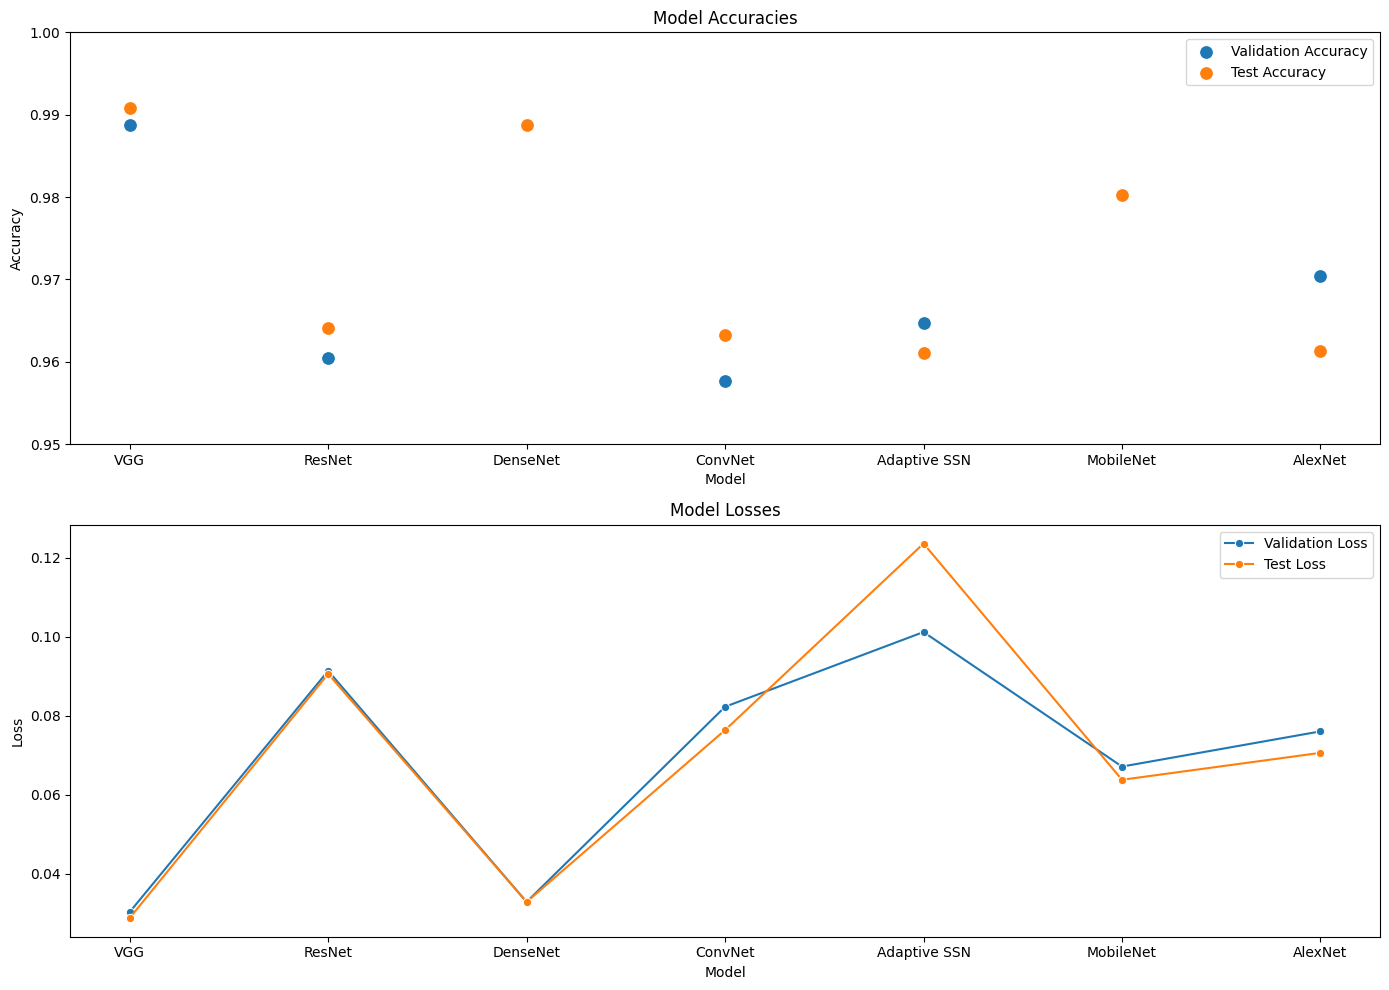

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame
data = {
    "Model": model_names,
    "Validation Accuracy": val_accuracies,
    "Test Accuracy": test_accuracies,
    "Validation Loss": val_losses,
    "Test Loss": test_losses
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 10))

# Scatter plot for accuracies
plt.subplot(2, 1, 1)
sns.scatterplot(x="Model", y="Validation Accuracy", data=df, s=100, label="Validation Accuracy")
sns.scatterplot(x="Model", y="Test Accuracy", data=df, s=100, label="Test Accuracy")
plt.title("Model Accuracies")
plt.ylabel("Accuracy")
plt.ylim(0.95, 1.0)
plt.legend()

# Line plot for losses
plt.subplot(2, 1, 2)
sns.lineplot(x="Model", y="Validation Loss", data=df, marker='o', label="Validation Loss")
sns.lineplot(x="Model", y="Test Loss", data=df, marker='o', label="Test Loss")
plt.title("Model Losses")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
